Task 5 AICP EDA Internship

Column names and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None
Column Names:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Vis

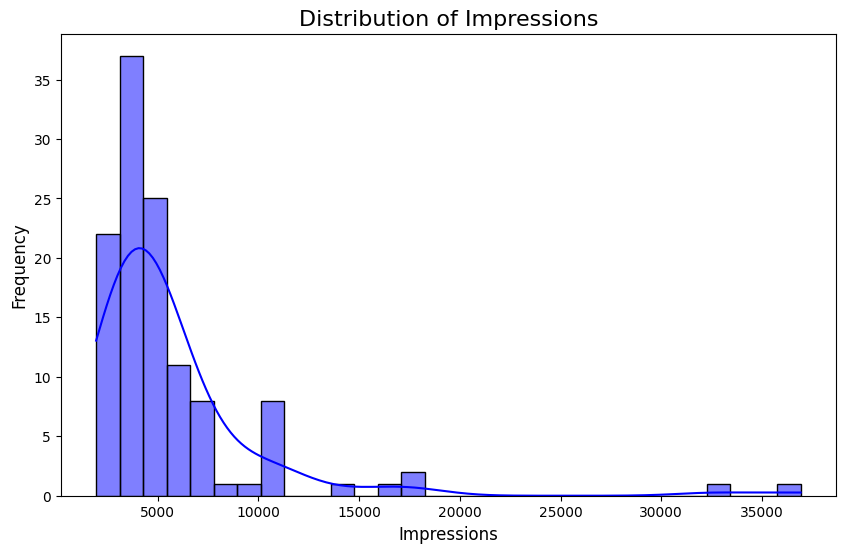

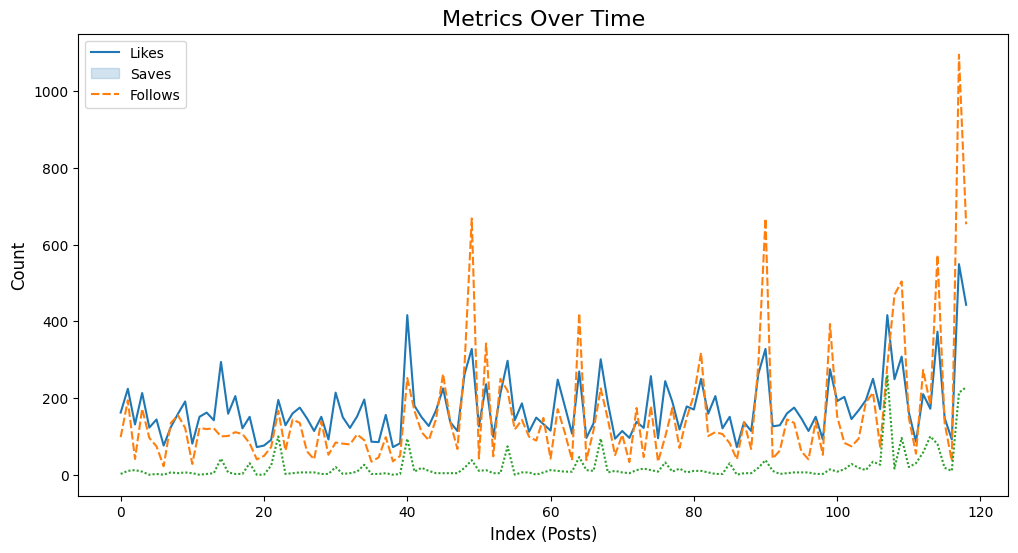

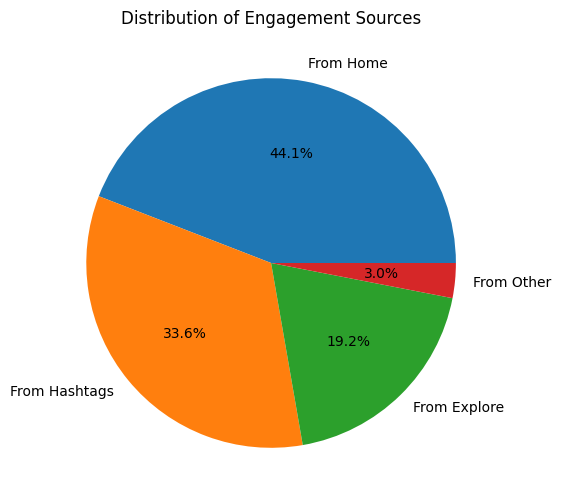

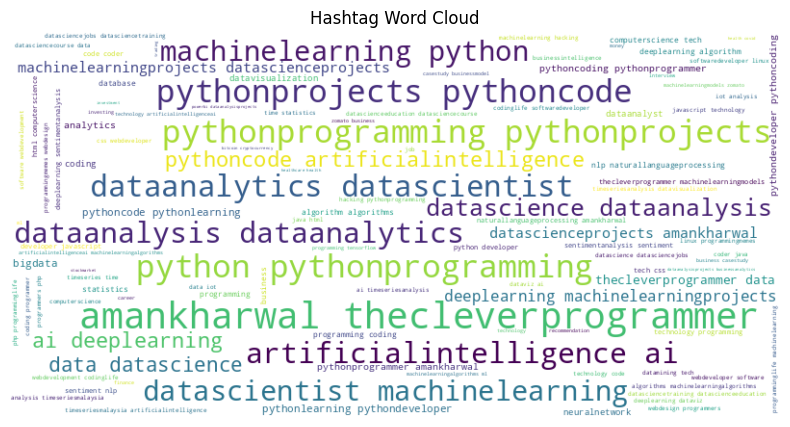

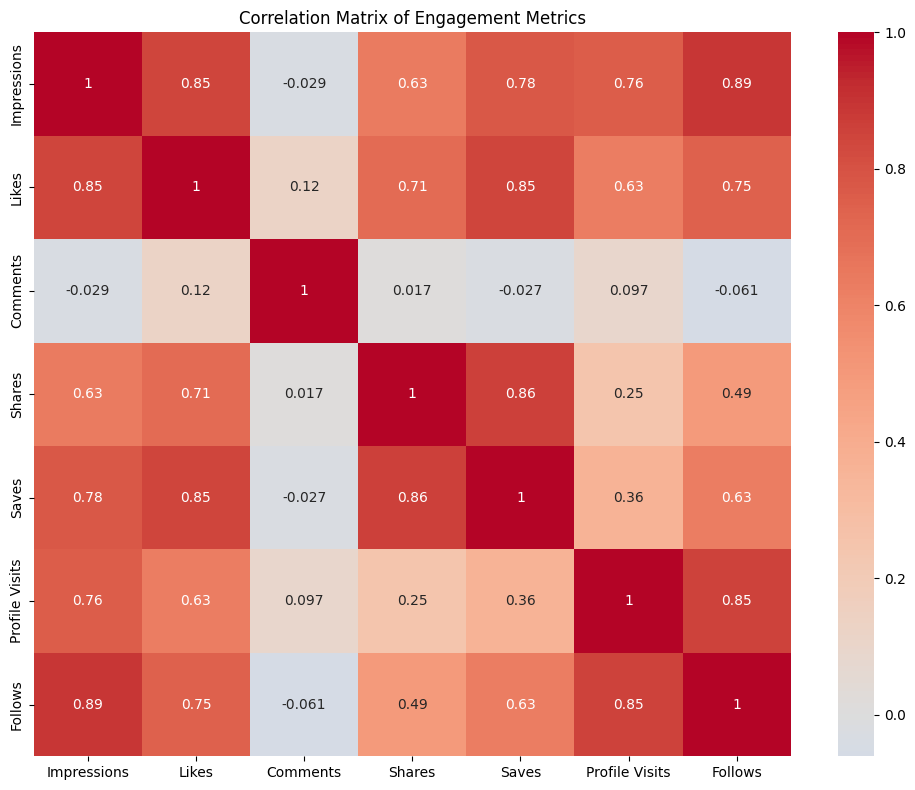

Strongest correlations:
Impressions vs Likes: 0.85
Impressions vs Shares: 0.63
Impressions vs Saves: 0.78
Impressions vs Profile Visits: 0.76
Impressions vs Follows: 0.89
Likes vs Shares: 0.71
Likes vs Saves: 0.85
Likes vs Profile Visits: 0.63
Likes vs Follows: 0.75
Shares vs Saves: 0.86
Saves vs Follows: 0.63
Profile Visits vs Follows: 0.85


In [3]:
# Q1: Show column names and info
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

df = pd.read_csv('Instagram data.csv', encoding="ISO-8859-1")
print("Column names and info:")
print(df.info())

# Display column names and descriptive statistics
print("Column Names:")
print(df.columns)

print("\
Descriptive Statistics:")
print(df.describe())

# Q3: Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Q4: Explore the distribution of the Impressions column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Impressions'], kde=True, bins=30, color='blue')
plt.title('Distribution of Impressions', fontsize=16)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Q5: Analyze metrics (Likes, Saves, Follows) over time
plt.figure(figsize=(12, 6))

# Plotting Likes, Saves, and Follows
sns.lineplot(data=df[['Likes', 'Saves', 'Follows']])
plt.title('Metrics Over Time', fontsize=16)
plt.xlabel('Index (Posts)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Likes', 'Saves', 'Follows'], loc='upper left')
plt.show()

# Q8: Distribution of engagement sources
engagement_sources = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

plt.figure(figsize=(10, 6))
plt.pie(engagement_sources, labels=engagement_sources.index, autopct='%1.1f%%')
plt.title('Distribution of Engagement Sources')
plt.show()

# Q10 & Q12: Analyze hashtags using wordcloud
from wordcloud import WordCloud

# Combine all hashtags
all_hashtags = ' '.join(df['Hashtags'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud')
plt.show()

# Q13: Correlation analysis between metrics
correlation_metrics = ['Impressions', 'Likes', 'Comments', 'Shares', 'Saves', 'Profile Visits', 'Follows']
correlation_matrix = df[correlation_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()
plt.show()

# Print key findings
print("\
Strongest correlations:")
for i in range(len(correlation_metrics)):
    for j in range(i+1, len(correlation_metrics)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.5:  # Only show strong correlations
            print(f"{correlation_metrics[i]} vs {correlation_metrics[j]}: {corr:.2f}")